In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import string
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [2]:
dataset = '/content/drive/MyDrive/Prak Big Data Analytics/Per-14/Data.csv'
df = pd.read_csv(dataset)

In [3]:
df.head()

,Unnamed: 0,Hasil-Stemming,sentiment,sentiment_score
0,0,February the people voted for Ganjar Mahfud to...,postif,0.900000
1,1,Vote for anti-corruption pro-people Mahfud Ind...,netral,0.000000
2,2,february gray ballot papers vote for gajar mah...,negatif,-0.600000
3,3,Later I will remember how Milu's father fought,netral,0.000000
4,4,live please millions of people in Semarang,postif,0.136364


In [4]:
df.drop(df.columns[0], axis=1, inplace=True)

In [5]:
df['sentiment'].replace({'postif': 'positif'}, inplace=True)
df.head()

,Hasil-Stemming,sentiment,sentiment_score
0,February the people voted for Ganjar Mahfud to...,positif,0.900000
1,Vote for anti-corruption pro-people Mahfud Ind...,netral,0.000000
2,february gray ballot papers vote for gajar mah...,negatif,-0.600000
3,Later I will remember how Milu's father fought,netral,0.000000
4,live please millions of people in Semarang,positif,0.136364


In [6]:
df['sentiment'].value_counts()

sentiment
positif    2443
netral     1025
negatif     671
Name: count, dtype: int64

<Axes: >

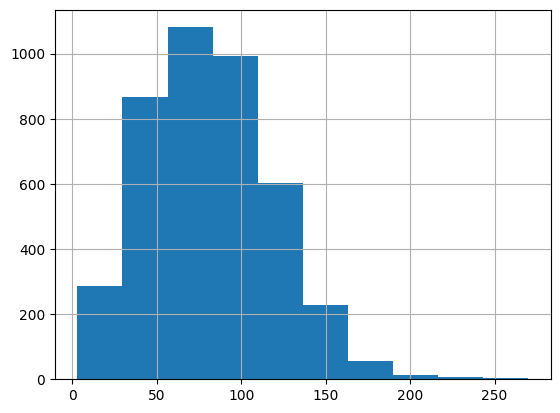

In [7]:
df['Hasil-Stemming'].str.len().hist()

Text(0.5, 1.0, 'Netral Reviews')

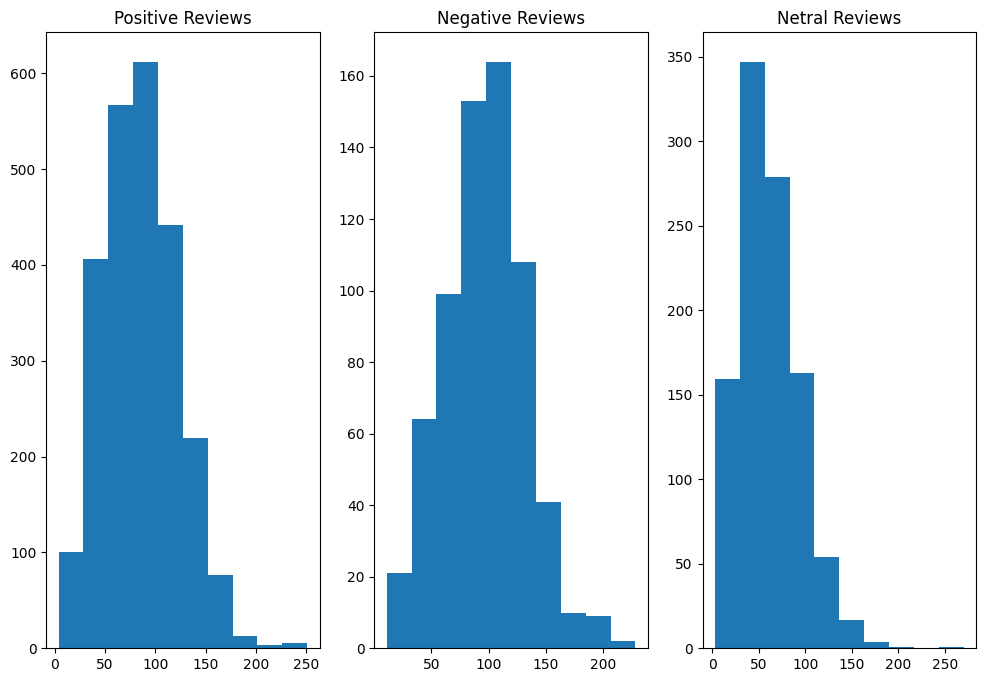

In [8]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(12,8))
ax1.hist(df[df['sentiment']=='positif']['Hasil-Stemming'].str.len())
ax1.set_title( 'Positive Reviews')
ax2.hist(df[df['sentiment']=='negatif']['Hasil-Stemming'].str.len())
ax2.set_title( 'Negative Reviews')
ax3.hist(df[df['sentiment']=='netral']['Hasil-Stemming'].str.len())
ax3.set_title( 'Netral Reviews')

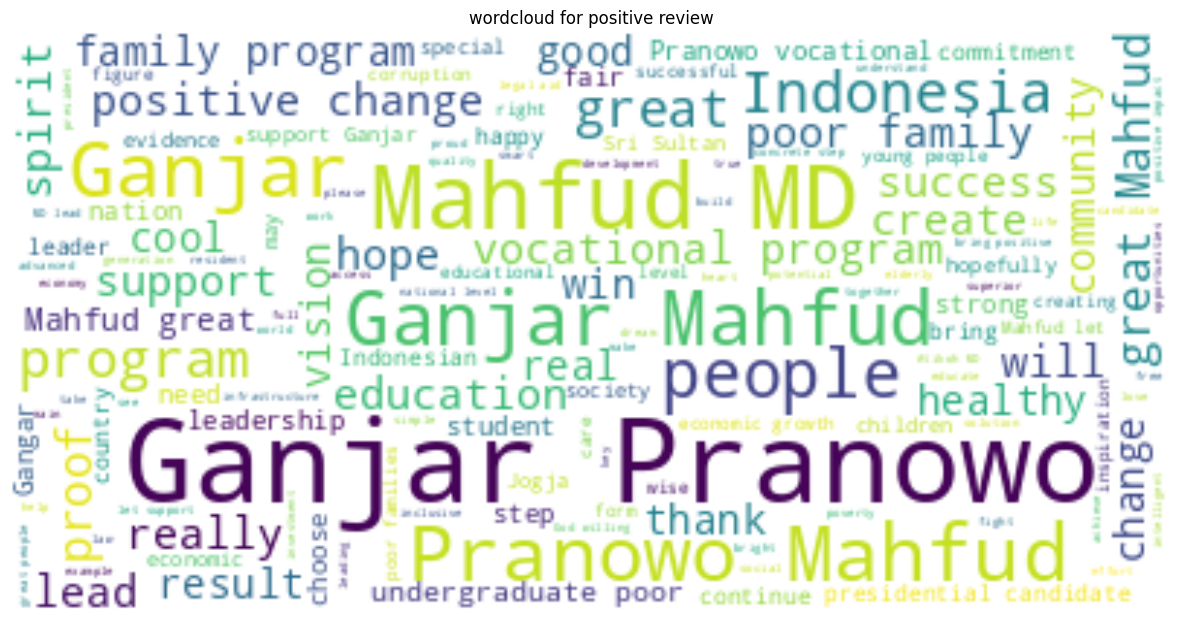

In [9]:
text = " ".join(i for i in df[df['sentiment']=='positif']['Hasil-Stemming'])
wordcloud = WordCloud( background_color="white").generate(text)

plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('wordcloud for positive review')
plt.show()

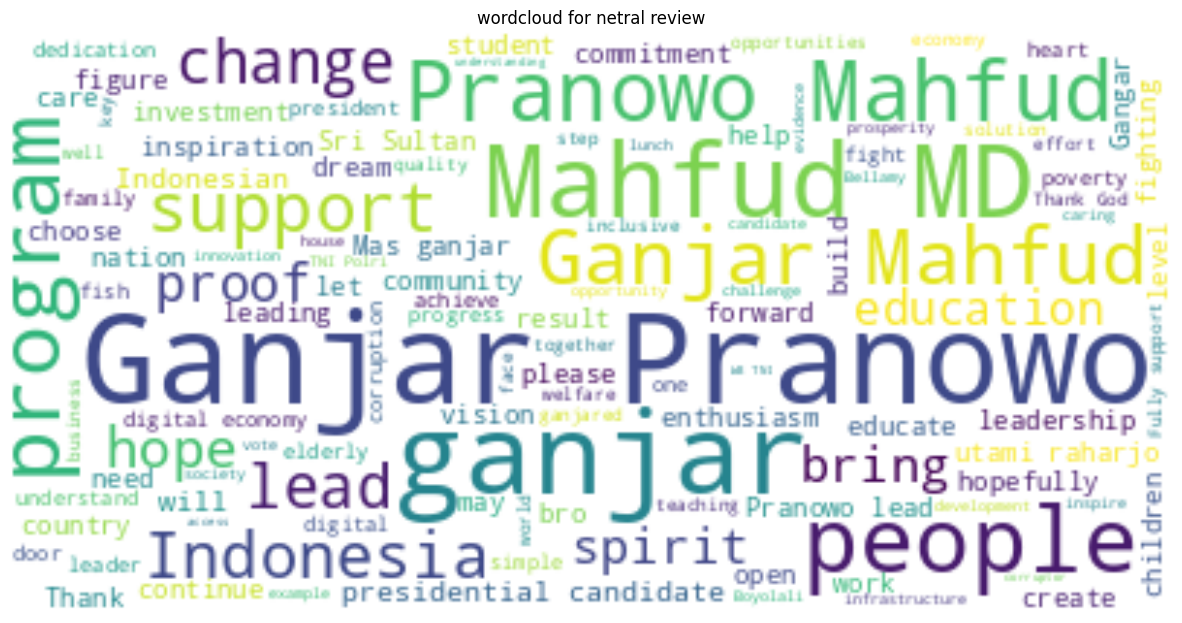

In [10]:
text = " ".join(i for i in df[df['sentiment']=='netral']['Hasil-Stemming'])
wordcloud = WordCloud( background_color="white").generate(text)

plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('wordcloud for netral review')
plt.show()

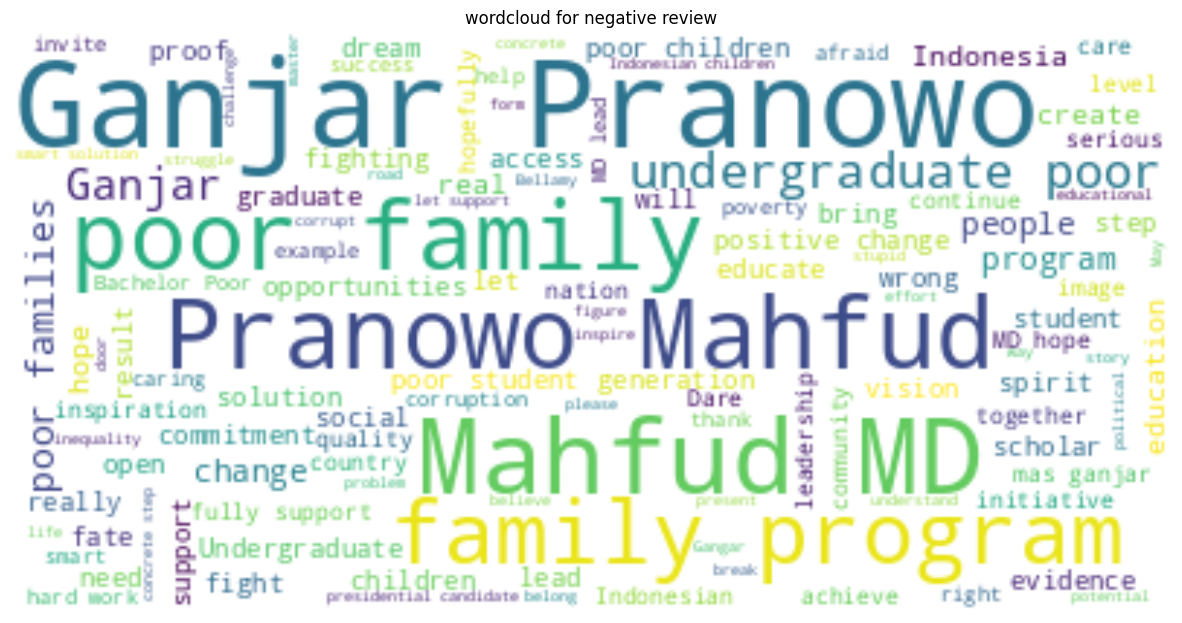

In [11]:
text = " ".join(i for i in df[df['sentiment']=='negatif']['Hasil-Stemming'])
wordcloud = WordCloud( background_color="white").generate(text)

plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('wordcloud for negative review')
plt.show()

In [12]:
nltk.download('stopwords')
nltk.download('punkt')

stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [13]:
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Tokenize and remove stopwords
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

In [14]:
# Terapkan fungsi remove_stopwords pada kolom 'Hasil-Stemming'
df['Hasil-Stemming'] = df['Hasil-Stemming'].apply(preprocess_text)

In [15]:
df.head()

,Hasil-Stemming,sentiment,sentiment_score
0,february people voted ganjar mahfud set people...,positif,0.900000
1,vote anti-corruption pro-people mahfud indonesia,netral,0.000000
2,february gray ballot papers vote gajar mahfud'...,negatif,-0.600000
3,later remember milu's father fought,netral,0.000000
4,live please millions people semarang,positif,0.136364


In [16]:
# Encode labels
label_encoder = LabelEncoder()
df['sentiment'] = label_encoder.fit_transform(df['sentiment'])

In [17]:
df

,Hasil-Stemming,sentiment,sentiment_score
0,february people voted ganjar mahfud set people...,2,0.900000
1,vote anti-corruption pro-people mahfud indonesia,1,0.000000
2,february gray ballot papers vote gajar mahfud'...,0,-0.600000
3,later remember milu's father fought,1,0.000000
4,live please millions people semarang,2,0.136364
...,...,...,...
4134,ganjar president concrete plan,2,0.150000
4135,mas ganjar targeted program please,1,0.000000
4136,ganjar mahfud active participation local busin...,0,-0.033333
4137,legal expert dares believe reluctant try break...,2,0.200000


In [18]:
# Feature extraction
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Hasil-Stemming'])
y = df['sentiment']

In [19]:
# Model training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [20]:
# Evaluation
y_pred = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

Accuracy: 0.5990338164251208
              precision    recall  f1-score   support

           0       0.60      0.02      0.04       138
           1       0.67      0.11      0.19       215
           2       0.60      0.99      0.74       475

    accuracy                           0.60       828
   macro avg       0.62      0.37      0.33       828
weighted avg       0.61      0.60      0.48       828



In [21]:
# Prediction
new_text = ["ganjar Mahfud's intelligent fair quick action of the people"]
new_text_transformed = vectorizer.transform(new_text)
prediction = model.predict(new_text_transformed)

# Convert numeric prediction back to original string labels
predicted_sentiment = label_encoder.inverse_transform(prediction)
print(f'Sentiment Prediction: {predicted_sentiment[0]}')

Sentiment Prediction: positif
